In [1]:
import pandas as pd
import numpy as np
import random

import os
import glob


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix , classification_report

from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import SeparableConv2D, BatchNormalization, Dropout, BatchNormalization, MaxPooling2D, Conv2D, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pylab as pl

In [2]:
import cv2

In [3]:
train_folder = glob.glob('/Users/noreen/Downloads/chest_xray/train/*/*')

In [4]:
normal = len([x for x in train_folder if 'NORMAL' in x])
normal

1341

In [5]:
val_folder = glob.glob('/Users/noreen/Downloads/chest_xray/val/*/*')

In [6]:
normal = len([x for x in val_folder if 'NORMAL' in x])
normal

8

In [7]:
test_folder = glob.glob('/Users/noreen/Downloads/chest_xray/test/*/*')

In [8]:
normal = len([x for x in test_folder if 'NORMAL' in x])
normal

234

In [9]:
img_size = 180
def inp_process(file):
    data = []
    for f in file:
        try:
            #print(f)
            part = f.split('/')
            #print(part)
            #print(part[-2])
            assert part[-2] in ['NORMAL','PNEUMONIA']
            label = 1 if part[-2] == 'PNEUMONIA' else 0
            img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
            r_siz = cv2.resize(img, (img_size, img_size))
        except Exception as e:
            raise Exception(e)
        data.append([r_siz, label])
    return np.array(data)

In [10]:
train = inp_process(train_folder)
test = inp_process(test_folder)
val = inp_process(val_folder)

In [11]:
train

array([[array([[205, 207, 204, ..., 196, 201, 212],
       [204, 204, 204, ..., 203, 209, 209],
       [204, 205, 203, ..., 202, 207, 213],
       ...,
       [ 18,  13,  11, ...,  47,  49,  51],
       [ 13,  13,  11, ...,  47,  47,  49],
       [ 13,  13,  11, ...,  45,  45,  46]], dtype=uint8),
        1],
       [array([[ 0,  5, 14, ..., 51, 47, 46],
       [ 0, 12, 15, ..., 55, 56, 50],
       [ 5, 13, 19, ..., 56, 52, 50],
       ...,
       [ 0,  1, 35, ...,  0,  0,  0],
       [ 0,  0, 35, ...,  0,  0,  0],
       [ 0,  0, 31, ...,  0,  0,  0]], dtype=uint8),
        1],
       [array([[45, 45, 45, ..., 27, 25, 30],
       [45, 43, 43, ..., 27, 25, 27],
       [44, 44, 44, ..., 27, 24, 26],
       ...,
       [47, 46, 44, ..., 51, 51, 58],
       [46, 45, 43, ..., 51, 53, 59],
       [46, 45, 43, ..., 51, 53, 58]], dtype=uint8),
        1],
       ...,
       [array([[58, 68, 73, ..., 51, 42, 32],
       [55, 62, 70, ..., 45, 38, 32],
       [53, 61, 69, ..., 45, 36, 25],
     

In [12]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [13]:
x_train = np.array(x_train) / 255.
x_val = np.array(x_val) / 255.
x_test = np.array(x_test) / 255.

In [14]:
x_train[0]

array([[0.80392157, 0.81176471, 0.8       , ..., 0.76862745, 0.78823529,
        0.83137255],
       [0.8       , 0.8       , 0.8       , ..., 0.79607843, 0.81960784,
        0.81960784],
       [0.8       , 0.80392157, 0.79607843, ..., 0.79215686, 0.81176471,
        0.83529412],
       ...,
       [0.07058824, 0.05098039, 0.04313725, ..., 0.18431373, 0.19215686,
        0.2       ],
       [0.05098039, 0.05098039, 0.04313725, ..., 0.18431373, 0.18431373,
        0.19215686],
       [0.05098039, 0.05098039, 0.04313725, ..., 0.17647059, 0.17647059,
        0.18039216]])

In [15]:
len(x_train[179])

180

In [16]:
x_train.shape

(5216, 180, 180)

In [17]:
x_test.shape

(624, 180, 180)

In [18]:
type(y_train)

list

In [19]:
y_train = np.array(y_train)

In [20]:
y_train.shape

(5216,)

In [21]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [22]:
y_test = np.array(y_test)

In [23]:
y_test.shape

(624,)

# XGBOOST MODEL

In [24]:
import xgboost as xgb

In [25]:
from xgboost import XGBClassifier

In [26]:
model1=XGBClassifier()

Getting an error with fitting xgboost model that input data should be 2 dimensional matrix. Therefore, convert np arrays to a matrix. 

In [27]:
#x_train_matrix=np.vstack(x_train)

In [28]:
#type(x_train_matrix)

In [29]:
#y_train_matrix = np.vstack(y_train)

In [30]:
x_train= x_train.reshape(x_train.shape[0],-1)

In [31]:
x_train.shape

(5216, 32400)

In [32]:
x_train

array([[0.80392157, 0.81176471, 0.8       , ..., 0.17647059, 0.17647059,
        0.18039216],
       [0.        , 0.01960784, 0.05490196, ..., 0.        , 0.        ,
        0.        ],
       [0.17647059, 0.17647059, 0.17647059, ..., 0.2       , 0.20784314,
        0.22745098],
       ...,
       [0.22745098, 0.26666667, 0.28627451, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.63137255, 0.40392157, 0.26666667, ..., 0.        , 0.        ,
        0.        ]])

In [33]:
x_test = x_test.reshape(x_test.shape[0],-1)

In [34]:
x_test.shape

(624, 32400)

Tried DMatrix but did not end up using it because we needed predefined parameters

In [35]:
#Dtrain = xgb.DMatrix(x_train, label=y_train)

In [36]:
#Dtest = xgb.DMatrix(x_test, label=y_test)

In [37]:
model1.fit(x_train,y_train)

[21:53:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
predictions1_train = model1.predict(x_train)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_train, predictions1_train)

1.0

In [41]:
print("Classification Report: \n", classification_report(y_train, predictions1_train))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216



In [42]:
#change x test into a 2d array
#x_test_matrix1 = x_test.reshape(x_test.shape[0],-1)

In [43]:
#x_test_matrix1.shape

In [44]:
predictions1_test=model1.predict(x_test)

In [45]:
accuracy_score(y_test, predictions1_test)

0.7339743589743589

In [46]:
print("Classification Report: \n", classification_report(y_test, predictions1_test))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.30      0.46       234
           1       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.83      0.65      0.64       624
weighted avg       0.80      0.73      0.69       624



Accuracy is 73%. Recall value is super low for 0. 

In [47]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1_test))

Confusion Matrix: 
 [[ 71 163]
 [  3 387]]


In [48]:
cm_model1=confusion_matrix(y_test, predictions1_test)

<Figure size 1080x1080 with 0 Axes>

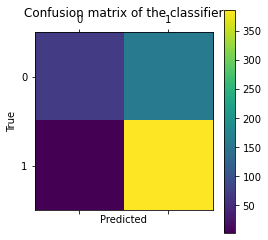

In [49]:
fig = plt.figure(figsize=(15,15))
pl.matshow(cm_model1)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
pl.show()

Text(33.0, 0.5, 'True')

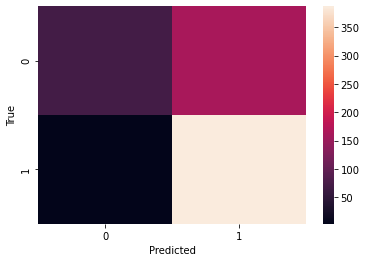

In [50]:
import seaborn as sns
sns.heatmap(cm_model1, annot=False)
plt.xlabel('Predicted')
plt.ylabel('True')

In [57]:
#confusion matrix with train 
cm_model1_train=confusion_matrix(y_train, predictions1_train)

Text(33.0, 0.5, 'True')

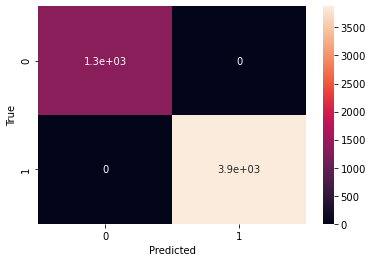

In [139]:
sns.heatmap(cm_model1_train, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [59]:
cm_model1_train

array([[1341,    0],
       [   0, 3875]])

Perform xgboost again but with randomized search

Try a different method where we transfrom the data into a matrix

In [60]:
#model2=xgb.XGBClassifier()

In [61]:
'''params2= {base_score=0.5, 
          booster='gbtree',
          colsample_bylevel=1,
          colsample_bynode=1,
          colsample_bytree=1,
          gamma=0,
          gpu_id=-1,
          importance_type='gain',
          interaction_constraints='',
          learning_rate=0.300000012,
          max_delta_step=0,
          max_depth=6,
          min_child_weight=1,
          missing=nan,
          monotone_constraints='()',
          n_estimators=100,
          n_jobs=4,
          num_parallel_tree=1,
          random_state=0,
          reg_alpha=0,
          reg_lambda=1,
          scale_pos_weight=1,
          subsample=1,
          tree_method='exact',
          validate_parameters=1,
          verbosity=None}'''

"params2= {base_score=0.5, \n          booster='gbtree',\n          colsample_bylevel=1,\n          colsample_bynode=1,\n          colsample_bytree=1,\n          gamma=0,\n          gpu_id=-1,\n          importance_type='gain',\n          interaction_constraints='',\n          learning_rate=0.300000012,\n          max_delta_step=0,\n          max_depth=6,\n          min_child_weight=1,\n          missing=nan,\n          monotone_constraints='()',\n          n_estimators=100,\n          n_jobs=4,\n          num_parallel_tree=1,\n          random_state=0,\n          reg_alpha=0,\n          reg_lambda=1,\n          scale_pos_weight=1,\n          subsample=1,\n          tree_method='exact',\n          validate_parameters=1,\n          verbosity=None}"

In [62]:
#model2=xgb.train(dtrain=Dtrain)

In [63]:
#Dtrain = xgb.DMatrix(x_train_matrix1, label=y_train)

In [64]:
#Dtest = xgb.DMatrix(x_test_matrix1, label=y_test)

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
model2 = xgb.XGBClassifier()

In [67]:
#paramaters
param_grid = {
'n_estimators': [100,200],
'learning_rate':[0.1,0.3],
'max_depth': [1,2],
'gamma': [0,0.50],
'random_state': [42]
}

In [68]:
#from sklearn.model_selection import RandomizedSearchCV

In [69]:
#rscv = RandomizedSearchCV(model2, param_grid, cv = 3, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [70]:
#rscv.fit(x_train, y_train)

In [72]:
from bayes_opt import BayesianOptimization

In [73]:
def xgbc_cv(max_depth,learning_rate,n_estimators,reg_alpha):
    from sklearn.metrics import roc_auc_score
    import numpy as np
    
    estimator_function = xgb.XGBClassifier(max_depth=int(max_depth),
                                           learning_rate= learning_rate,
                                           n_estimators= int(n_estimators),
                                           reg_alpha = reg_alpha,
                                           nthread = -1,
                                           objective='binary:logistic',
                                           seed = 42)
    # Fit the estimator
    estimator_function.fit(x_train,y_train)
    

In [74]:
hyperparameter_space = {
    'max_depth': (5, 20),
    'learning_rate': (0, 1),
    'n_estimators' : (10,100),
    'reg_alpha': (0,1)
}

In [75]:
xgbcBO = BayesianOptimization(f = xgbc_cv, 
                             pbounds =  hyperparameter_space,
                             random_state = 42,
                             verbose = 10)


In [76]:
gp_params = {"alpha": 1e-10}

In [77]:
import xgboost as xgb

xgbcBO.maximize(init_points=3,n_iter=10,acq='ucb', kappa= 3, **gp_params)

Go back to random forest and trying different parameters like different objectives

In [78]:
model3=XGBClassifier(objective='binary:logistic')

In [79]:
model3.fit(x_train, y_train)

[22:45:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
print(model3.objective)

binary:logistic


In [81]:
predictions3_train = model3.predict(x_train)

In [82]:
accuracy_score(y_train, predictions3_train)

1.0

print("Classification Report: \n", classification_report(y_train, predictions3_train))

In [84]:
predictions3_test=model3.predict(x_test)

In [85]:
accuracy_score(y_test, predictions3_test)

0.7339743589743589

Did not use model4 because multisoftprob can not be applied to a binary classification problem

In [131]:
#model4=XGBClassifier(objective="multi:softprob")

In [132]:
#model4.fit(x_train, y_train)

Multisostmax does not work because there are only two classes

In [88]:
model5=XGBClassifier(objective="binary:logitraw")

In [89]:
model5.fit(x_train, y_train)

[22:58:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logitraw', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
predictions5_train = model5.predict(x_train)

In [91]:
accuracy_score(y_train, predictions5_train)

1.0

In [92]:
predictions5_test=model5.predict(x_test)

In [93]:
accuracy_score(y_test, predictions5_test)

0.7516025641025641

In [94]:
model6=XGBClassifier(objective='binary:hinge')

In [95]:
model6.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:hinge', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
predictions6_train = model6.predict(x_train)

In [97]:
accuracy_score(y_train, predictions6_train)

1.0

In [98]:
predictions6_test=model6.predict(x_test)

In [99]:
accuracy_score(y_test, predictions6_test)

0.7596153846153846

In [100]:
#confusion matrix with train 
cm_model6_train=confusion_matrix(y_train, predictions6_train)

Text(33.0, 0.5, 'True')

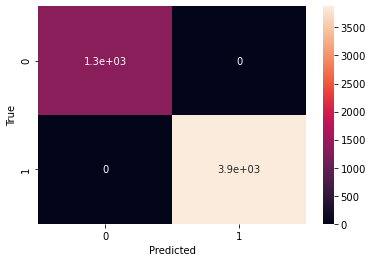

In [140]:
import seaborn as sns
sns.heatmap(cm_model6_train, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

Text(33.0, 0.5, 'True')

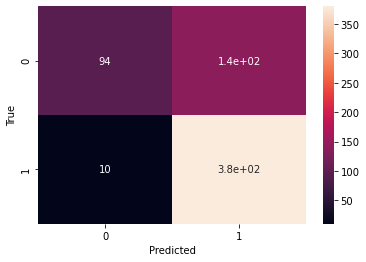

In [141]:
cm_model6_test=confusion_matrix(y_test, predictions6_test)
sns.heatmap(cm_model6_test, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [103]:
x_train

array([[0.80392157, 0.81176471, 0.8       , ..., 0.17647059, 0.17647059,
        0.18039216],
       [0.        , 0.01960784, 0.05490196, ..., 0.        , 0.        ,
        0.        ],
       [0.17647059, 0.17647059, 0.17647059, ..., 0.2       , 0.20784314,
        0.22745098],
       ...,
       [0.22745098, 0.26666667, 0.28627451, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.63137255, 0.40392157, 0.26666667, ..., 0.        , 0.        ,
        0.        ]])

In [104]:
x_train.shape

(5216, 32400)

In [105]:
x_train[1]

array([0.        , 0.01960784, 0.05490196, ..., 0.        , 0.        ,
       0.        ])

In [41]:
x_train_subset = x_train[3650:4150]

In [42]:
x_train_subset

array([[0.43921569, 0.43529412, 0.36862745, ..., 0.00784314, 0.00392157,
        0.        ],
       [0.78431373, 0.80392157, 0.76862745, ..., 0.0627451 , 0.06666667,
        0.07843137],
       [0.06666667, 0.09803922, 0.10980392, ..., 0.23921569, 0.21568627,
        0.15686275],
       ...,
       [0.0745098 , 0.10196078, 0.14117647, ..., 0.        , 0.        ,
        0.        ],
       [0.22745098, 0.23921569, 0.24705882, ..., 0.        , 0.        ,
        0.        ],
       [0.05098039, 0.11372549, 0.13333333, ..., 0.        , 0.        ,
        0.        ]])

In [43]:
y_train.shape

(5216,)

In [44]:
y_train_subset = y_train[3650:4150]

In [45]:
y_train_subset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
model7=xgb.XGBClassifier()

In [114]:
#paramaters
param_grid = {
'n_estimators': [100,200],
'learning_rate':[0.1,0.3],
'max_depth': [1,2],
'gamma': [0,0.50],
'random_state': [42]
}

In [115]:
rscv = RandomizedSearchCV(model7, param_grid, cv = 3, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [116]:
rscv.fit(x_train_subset, y_train_subset)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 16.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 16.4min finished


[23:34:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [117]:
rscv.best_params_

{'random_state': 42,
 'n_estimators': 200,
 'max_depth': 1,
 'learning_rate': 0.1,
 'gamma': 0}

In [118]:
rscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
rscv_best_model=rscv.best_estimator_

In [120]:
rscv_best_model.fit(x_train, y_train)

[23:36:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
predictions7_train = rscv_best_model.predict(x_train)

In [122]:
accuracy_score(y_train, predictions7_train)

0.9712423312883436

In [123]:
predictions7_test=rscv_best_model.predict(x_test)

In [124]:
accuracy_score(y_test, predictions7_test)

0.7083333333333334

In [125]:
#confusion matrix with train 
cm_model7_train=confusion_matrix(y_train, predictions7_train)

Text(33.0, 0.5, 'True')

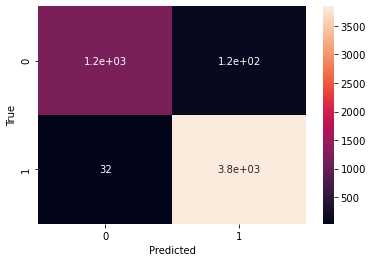

In [142]:
sns.heatmap(cm_model7_train, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [127]:
cm_model7_test=confusion_matrix(y_test, predictions7_test)

Text(33.0, 0.5, 'True')

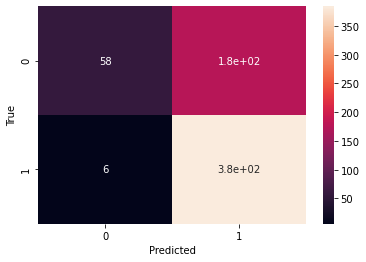

In [143]:
sns.heatmap(cm_model7_test, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

Implement smote because we have an imbalanced dataset

In [1]:
import imblearn

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm=SMOTE(sampling_strategy='auto')

In [46]:
y_train_subset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Apply smote to whole dataset

In [48]:
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [49]:
x_train_smote

array([[0.80392157, 0.81176471, 0.8       , ..., 0.17647059, 0.17647059,
        0.18039216],
       [0.        , 0.01960784, 0.05490196, ..., 0.        , 0.        ,
        0.        ],
       [0.17647059, 0.17647059, 0.17647059, ..., 0.2       , 0.20784314,
        0.22745098],
       ...,
       [0.39129949, 0.42422799, 0.42562514, ..., 0.        , 0.        ,
        0.        ],
       [0.17631688, 0.19725753, 0.22790671, ..., 0.        , 0.        ,
        0.        ],
       [0.00397718, 0.13124689, 0.01458299, ..., 0.66193983, 0.65934399,
        0.66193983]])

In [50]:
y_train_smote

array([1, 1, 1, ..., 0, 0, 0])

In [52]:
y_train_smote[y_train_smote==1].shape

(3875,)

In [53]:
y_train_smote[y_train_smote==0].shape

(3875,)

Use the rscv model but instead of running it again just use the best parameters 

In [56]:
from numpy import nan

In [57]:
model8=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
model8.fit(x_train_smote, y_train_smote)

[11:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
predictions8_train = model8.predict(x_train_smote)

In [61]:
accuracy_score(y_train_smote, predictions8_train)

0.9713548387096774

In [62]:
predictions8_test=model8.predict(x_test)

In [63]:
accuracy_score(y_test, predictions8_test)

0.7692307692307693

In [64]:
cm_model8_test=confusion_matrix(y_test, predictions8_test)

In [66]:
import seaborn as sns

Text(33.0, 0.5, 'True')

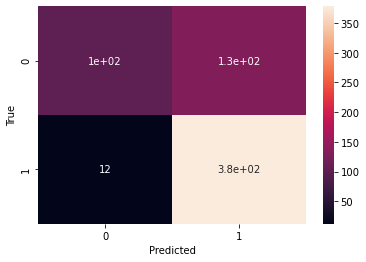

In [67]:
sns.heatmap(cm_model8_test, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [70]:
cm_model8_test

array([[102, 132],
       [ 12, 378]])